In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json

# Load games data from a .json file
def load_json_data():
    with open('../data/test_data_big.json') as f:
        data = json.loads(f.read())
        print(data)
        return data

data = load_json_data()

In [120]:
def get_specific_data(array_to_fill, data_type, sample_size = "-1"):
    for i in data.keys():
        if(sample_size > str(len(data.keys()))):
            print(f'not enough games! (requested: {sample_size} available: {len(data.keys())})')
            return
        if(i == sample_size):
            print(f'received {sample_size} samples')
            return
        array_to_fill.append(data[i][data_type])

[10, 7, 8, 9, 13, 5, 1, 5, 14, 8, 0, 0, 4, 8, 8, 2, 10, 3, 0, 14, 14, 15, 5, 13, 13, 12, 0, 10, 12, 15, 13, 10, 9, 14, 7, 7, 15, 1, 9, 9, 3, 4, 6, 0, 12, 1, 5, 0, 9, 2, 13, 3, 12, 14, 11, 11, 11, 11, 5, 7, 14, 4, 10, 3, 12, 5, 1, 14, 8, 3, 14, 9, 8, 9, 12, 10, 7, 3, 4, 2, 13, 0, 9, 13, 4, 8, 6, 12, 11, 9, 2, 12, 8, 9, 8, 6, 3, 12, 4, 11, 3, 1, 13, 7, 5, 6, 2, 14, 5, 9, 4, 6, 0, 10, 2, 5, 13, 13, 1, 9, 11, 14, 14, 1, 14, 0, 2, 1, 10, 2, 0, 4, 3, 11, 5, 12, 2, 8, 10, 5, 15, 10, 6, 0, 7, 4, 9, 5, 12, 2, 7, 15, 1, 5, 13, 10, 5, 2, 15, 0, 3, 3, 4, 8, 4, 2, 4, 10, 4, 4, 11, 1, 6, 14, 12, 8, 12, 13, 7, 2, 11, 8, 11, 1, 3, 5, 12, 5, 2, 10, 13, 3, 15, 9, 12, 7, 1, 8, 11, 6, 12, 5, 10, 12, 1, 2, 14, 13, 11, 8, 3, 8, 15, 10, 1, 10, 2, 6, 3, 6, 4, 6, 5, 11, 11, 12, 14, 13, 7, 3, 11, 0, 14, 4, 15, 15, 12, 8, 6, 6, 8, 4, 8, 7, 11, 3, 1, 6, 7, 6, 13, 5, 15, 3, 5, 3, 9, 9, 14, 4, 12, 14, 7, 14, 0, 6, 14, 11, 12, 13, 14, 0, 2, 15, 3, 9, 11, 9, 4, 5, 10, 15, 12, 0, 14, 0, 4, 7, 12, 6, 3, 6, 13, 5, 8, 14

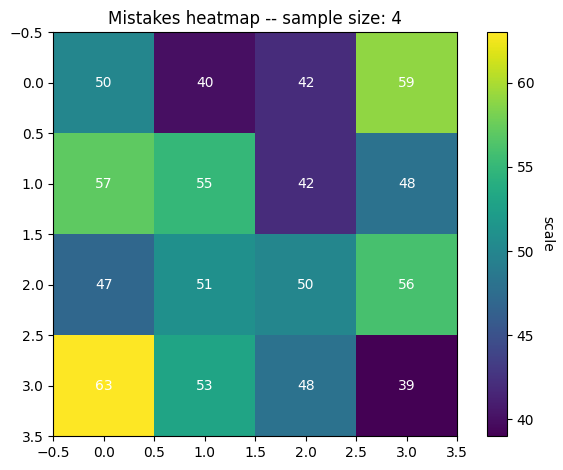

In [132]:
# Show a heatmap of mistakes of n sampled games

mistakes_data = []
game_array = [0] * 16
sample_size = 800

def mistakes_heatmap(sample_size): # Note: Sample size has to be a string (python u weird for this)
    get_specific_data(mistakes_data,'last_tile',sample_size)
    print(mistakes_data)

mistakes_heatmap(f"{sample_size}") # 20+ for decent results

for i in mistakes_data:
    game_array[i] = (game_array[i] + 1)

heatmap_arr = [game_array[i:i + 4] for i in range(0, len(game_array), 4)]
print(f'heatmap arr: ', heatmap_arr)

def display_heatmap(data_array, cbarlabel, ax=None, cbar_kw=None):
    # Generate basic plot
    fig, ax = plt.subplots()
    im = ax.imshow(data_array)

    # Loop over data and create text annotations
    for i in range(len(data_array)):
        for j in range(len(data_array)):
            text = ax.text(j, i,data_array[i][j], ha="center", va="center", color="w" )

    # Create colorbar
    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}
    
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel,rotation=-90, va="bottom")

    # Display the heatmap
    ax.set_title(f"Mistakes heatmap -- sample size: {sample_size}")
    fig.tight_layout()
    plt.show()

display_heatmap(heatmap_arr, cbarlabel="scale")